# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../Data/yelp.csv')
yelp.head(1)

C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


#### Comment:

I get the following warning:

        C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

          UserWarning)
  
This appears to come from scipy 0.17 and is under investigation/fix.

See:  https://github.com/conda/conda/issues/2030, https://travis-ci.org/pydata/pandas/jobs/118384117, https://travis-ci.org/pydata/pandas/jobs/116251314

## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../Data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    
# Confirm what the datatype is of the object

type(data)

list

In [3]:
# Get the datatype of each item in the data list

type(data[1])

dict

#### Comment:

The data object is a list of dictionaries

In [4]:
# Look at the first dictionary in the data list
print data[0]

{u'votes': {u'funny': 0, u'useful': 5, u'cool': 2}, u'user_id': u'rLtl8ZkDX5vH5nAx9C3q5Q', u'review_id': u'fWKvX83p0-ka4JS3dc6E5A', u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever

In [5]:
# Show the first review
print "The first review in the JSON file says:\n"
print data[0]['text']

The first review in the JSON file says:

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


#### Comment:

The above shows the value of the 'text' key in the dictionary in the first row of the data list

In [6]:
# Convert the list of dictionaries to a DataFrame

yelp_reviews_df = pd.DataFrame(data)

# Confirm the conversion looks correct

yelp_reviews_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [7]:
# Confirm how to access each part of the 'votes' dictionary in the 'votes' column of the yelp_reviews_df dataframe

yelp_reviews_df['votes'][0]['funny']

0

In [8]:
# Confirm the length of the dataframe, and how to access it to use in a for loop or list comprehension

len(yelp_reviews_df.index)

10000

In [9]:
# Confirm the column names of the yelp_reviews_df dataframe

yelp_reviews_df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
        u'user_id', u'votes'],
       dtype='object')]

In [10]:
# Look at the expanded dataframe

yelp_reviews_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [11]:
# Convert the yelp_reviews_df dataframe 'votes' column into a list which can be converted into a new, separate votes dataframe

votes_df = pd.DataFrame(yelp_reviews_df['votes'].tolist())
votes_df.head()

,cool,funny,useful
0,2,0,5
1,0,0,0
2,0,0,1
3,1,0,2
4,0,0,0


In [12]:
# Concatenate the columns (axis=1) of the new votes dataframe to the end of the columns of the yelp_reviews_df dataframe
# Specify the order of the concatenated columns to match the order in the 'votes' column lists for ease of visual inspection


yelp_reviews_expanded_df = pd.concat([yelp_reviews_df, votes_df['funny'], votes_df['useful'], votes_df['cool']], axis=1, join='outer')
yelp_reviews_expanded_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes,funny,useful,cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0


In [13]:
# Drop the votes column and then display the head

yelp_reviews_expanded_df.drop('votes', axis=1, inplace=True)
yelp_reviews_expanded_df.head()

,business_id,date,review_id,stars,text,type,user_id,funny,useful,cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [14]:
# Treat stars as a categorical variable and look for differences between groups by comparing the means of the groups

# Group the reviews by the number of stars and take the mean of each vote type
# The python compiler only applies the mean() method to columns with numeric data types

yelp_reviews_expanded_df.groupby('stars').mean()

,funny,useful,cool
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


#### Analysis:

We can see that across all star rating, ratings are more often flagged as 'useful'.

The lower the rating for a business, the review is flagged more often as funny and useful.

The trend for ratings getting flagged as 'cool' is the opposite. The higher the rating for a business, the review is flagged more often as cool.  A small exception to this trend is a rating of 4 is flagged as 'cool' a little more often than a rating of '5'.

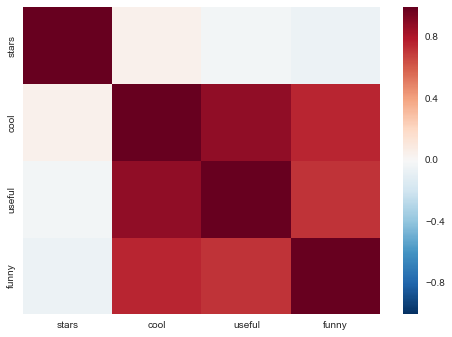

In [15]:
# Display a correlation matrix of the vote types (cool/useful/funny) and stars

%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

(0, 8)

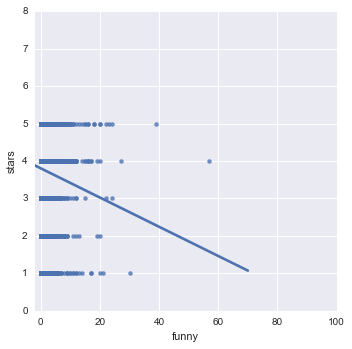

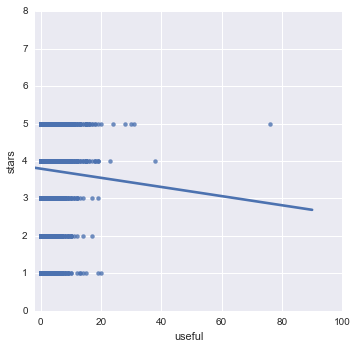

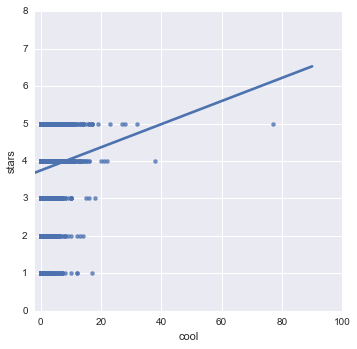

In [16]:
# Display multiple scatter plots (cool, useful, funny) with linear regression line

# Set the x limits and y limits to be the same for each plot to give an accurate visual comparison.

sns.lmplot(x='funny', y='stars', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(-2, 100)
sns.plt.ylim(0, 8)

sns.lmplot(x='useful', y='stars', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(-2, 100)
sns.plt.ylim(0, 8)

sns.lmplot(x='cool', y='stars', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(-2, 100)
sns.plt.ylim(0, 8)

#### Analysis:

As discussed above, we see that receiving 'funny' or 'useful' vote types is negatively correlated with the number of stars, while 'cool' vote types are positively correlated with the number of stars.

#### Experiment:

This is not part of the homework assignment, but I wanted to experiment with it.

Given that a review is comprised of stars, and the vote type is assigned afterward, I would like to examine the vote type as the response variable.

I do not understand my results... why I get the linear model that I do.  I need to investigate further.

(-2, 100)

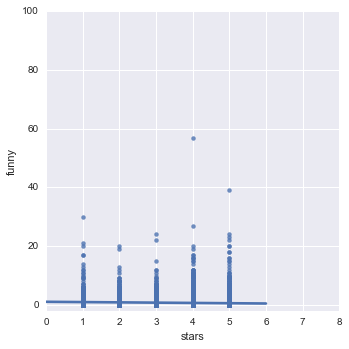

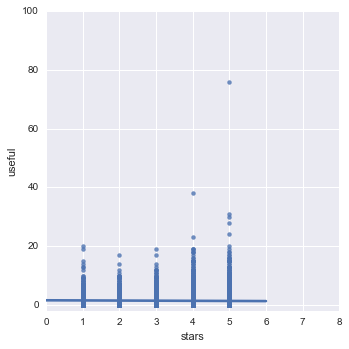

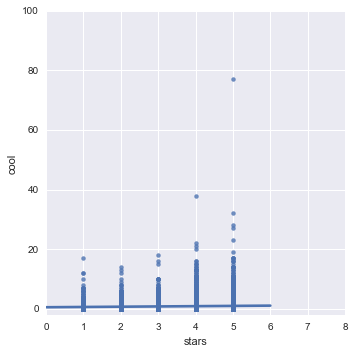

In [17]:
# Display multiple scatter plots (cool, useful, funny) with linear regression line

# Set the x limits and y limits to be the same for each plot to give an accurate visual comparison.

sns.lmplot(x='stars', y='funny', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(0, 8)
sns.plt.ylim(-2, 100)

sns.lmplot(x='stars', y='useful', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(0, 8)
sns.plt.ylim(-2, 100)

sns.lmplot(x='stars', y='cool', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(0, 8)
sns.plt.ylim(-2, 100)

#### Analysis:

I do not understand my results... why I get the linear model that I do. I need to investigate further.


## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [18]:
# Create feature matrix (X)

feature_cols = ['funny', 'useful', 'cool']
X = yelp[feature_cols]

# print(x)

print(X.shape)

(10000, 3)


In [19]:
# Create response vector (y)

y = yelp.stars
y.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [20]:
# print(y)

print(y.shape)

(10000L,)


## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [21]:
from sklearn.linear_model import LinearRegression

# Create linear regression object

yelp_regression = LinearRegression()

yelp_regression.fit(X, y)

# print the coefficients

print yelp_regression.intercept_
print yelp_regression.coef_

3.83989479278
[-0.13567449 -0.14745239  0.27435947]


#### Analysis:

The intercept tells us that in the absence of a review being given any vote types ('funny', 'useful', or 'cool')... or, when all of the features in our features matrix are '0'... the average rating for a business on Yelp is 3.8 stars.

The coefficients for our linear equation would be as follows:

* 'funny' = -0.13567449
* 'useful' = -0.14745239
* 'cool' = 0.27435947

The linear equation for our model would look something like this:

stars = 3.83989479278 + (-0.13567449 \* funny) + (-0.14745239 \* useful) + (0.27435947 \* cool)

As we saw in our scatter plots, this model shows that stars is negatively correlated with funny and useful, and positively correlated with cool.  Our model weights these features appropropriately, with the assumption that they are independent from one another.


As I explored the Yelp website, I did detect similar trends.  I selected several restaurants.  I first sorted the reviews highest to lowest.  The highest 10 reviews had a very low number of vote types selected (1 or 2).  Then, I sorted the reviews lowest to highest.  The lowest 10 reviews had a very high number of 'useful' vote types selected, and a few 'funny' vote types selected.  The vote type of 'useful' was most frequently selected across for the lowest reviews.

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

# Split the data features, X, and response, y, into training and testing sets.
# Use random_state for reproducibility.
# The train_test_split method defaults to 25% split for the test data

yelp_X_train, yelp_X_test, yelp_y_train, yelp_y_test = train_test_split(X, y, random_state=8)

# Create linear regression object for our training data

yelp_regression_train = LinearRegression()

# Train the model using the training sets

yelp_regression_train.fit(yelp_X_train, yelp_y_train)

# print the coefficients

print yelp_regression_train.intercept_
print yelp_regression_train.coef_

3.84025538339
[-0.12751003 -0.15085085  0.26697377]


#### Analysis:

When we use our training data, the intercept in the absence of a review being given any vote types ('funny', 'useful', or 'cool') gives the average rating for a business on Yelp as just slightly higher... 3.84025538339 rather than 3.83989479278.

The coefficients for our linear equation would be as follows:

* 'funny' = -0.12751003
* 'useful' = -0.14516459
* 'cool' = 0.25429495

The vote type of 'funny' is a little less negatively correlated, 'useful' is also very slightly less negatively correlated, and 'cool' is less positively correlated.

The linear equation for our model would look something like this:

stars_train = 3.84025538339 + (-0.12751003 \* funny) + (-0.14516459 \* useful) + (0.25429495 \* cool)

As we saw in our scatter plots for our full data set, the model on our training data still shows that stars is negatively correlated with funny and useful, and positively correlated with cool.  Our model weights these features slightly different, with the assumption that they are independent from one another.

In [23]:
# Predict the response with our test data

yelp_y_predict = yelp_regression_train.predict(yelp_X_test)

# Compute the RMSE (root mean squared error regression loss)

yelp_y_true = yelp_y_test

print 'RMSE:', np.sqrt(metrics.mean_squared_error(yelp_y_true, yelp_y_predict))

RMSE: 1.17299016176


Analysis:

The root mean squared error, RMSE, tells us that our predicted values for stars is 1.17 stars less than the actual value of the stars, given the same vote type feature set.  This seems like a significant error.

In [25]:
# define a function that accepts a list of features and returns testing RMSE
# calculate RMSE with all three features

def my_rmse(data_df, response, features_list):
    X = data_df[features_list]
    y = response
    data_df_regression = LinearRegression()
    data_df_regression.fit(X, y)
    data_df_X_train, data_df_X_test, data_df_y_train, data_df_y_test = train_test_split(X, y, random_state=8)
    data_df_regression_train = LinearRegression()
    data_df_regression_train.fit(data_df_X_train, data_df_y_train)
    data_df_y_predict = data_df_regression_train.predict(data_df_X_test)
    data_df_y_true = data_df_y_test
    return (np.sqrt(metrics.mean_squared_error(data_df_y_true, data_df_y_predict)))
    # Note: To do 'by hand':  np.sqrt(((predictions - targets) ** 2).mean())
    

feature_cols = ['funny', 'useful', 'cool']
my_rmse(yelp, yelp.stars, feature_cols)


1.1729901617648542

## Task 6

Try removing some of the features and see if the RMSE improves.

In [26]:
# Create a dataframe to keep track of the features used in each linear model along with the corresponding linear model RMSE

index = range(7)
columns = ['funny_on','useful_on','cool_on', 'RMSE']
feature_compare_df = pd.DataFrame(0, index = index, columns=columns)
#pd.to_numeric(feature_compare_df.RMSE, errors='ignore')
pd.to_numeric(feature_compare_df.RMSE)
feature_compare_df.RMSE = 0.00
feature_compare_df

,funny_on,useful_on,cool_on,RMSE
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
5,0,0,0,0.0
6,0,0,0,0.0


In [27]:
# Create a linear model for each possible combination of features and report the RMSE

feature_cols = ['funny', 'useful', 'cool']
feature_compare_df.funny_on[0] = 1
feature_compare_df.useful_on[0] = 1
feature_compare_df.cool_on[0] = 1
feature_compare_df.RMSE[0] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['funny', 'useful']
feature_compare_df.funny_on[1] = 1
feature_compare_df.useful_on[1] = 1
feature_compare_df.cool_on[1] = 0
feature_compare_df.RMSE[1] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['useful', 'cool']
feature_compare_df.funny_on[2] = 0
feature_compare_df.useful_on[2] = 1
feature_compare_df.cool_on[2] = 1
feature_compare_df.RMSE[2] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['funny', 'cool']
feature_compare_df.funny_on[3] = 1
feature_compare_df.useful_on[3] = 0
feature_compare_df.cool_on[3] = 1
feature_compare_df.RMSE[3] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['funny']
feature_compare_df.funny_on[4] = 1
feature_compare_df.useful_on[4] = 0
feature_compare_df.cool_on[4] = 0
feature_compare_df.RMSE[4] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['useful']
feature_compare_df.funny_on[5] = 0
feature_compare_df.useful_on[5] = 1
feature_compare_df.cool_on[5] = 0
feature_compare_df.RMSE[5] = my_rmse(yelp, yelp.stars, feature_cols)

feature_cols = ['cool']
feature_compare_df.funny_on[6] = 0
feature_compare_df.useful_on[6] = 0
feature_compare_df.cool_on[6] = 1
feature_compare_df.RMSE[6] = my_rmse(yelp, yelp.stars, feature_cols)

feature_compare_df

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,funny_on,useful_on,cool_on,RMSE
0,1,1,1,1.172990
1,1,1,0,1.196656
2,0,1,1,1.185043
3,1,0,1,1.181039
4,1,0,0,1.197303
5,0,1,0,1.198662
6,0,0,1,1.196566


#### Analysis:

Given the vote type feature set of 'funny', 'useful' and 'cool', the Root Mean Square Error (RMSE) for the linear model that includes on the 'useful' vote type has the highest 'loss' while the linear model that uses all three has the lowest loss.  It appears that the best fit occurs when using all three features.

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [28]:
# new feature: 

# Create a new feature based on whether or not the review has the word 'love' mentioned in the review.

yelp['love_review'] = ((yelp.apply(lambda x: 'love' in x['text'], axis=1)
                      | yelp.apply(lambda x: 'LOVE' in x['text'], axis=1)
                      | yelp.apply(lambda x: 'Love' in x['text'], axis=1)))

#### Comment:

The above code can probably be done more elegantly.  I could not figure out how to incorporate the to_lower method so that finding the word 'love' would be case insensitive.


In [29]:
# Check the addition of the new column which reports whether or not the word 'love' appears in the review

print yelp.head()

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny love_review  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0       False  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0       False  

In [30]:
# Group the reviews by the number of stars and report the number of reviews with the word 'love'

yelp.groupby(['stars','love_review']).size()

stars  love_review
1      False           683
       True             66
2      False           826
       True            101
3      False          1199
       True            262
4      False          2677
       True            849
5      False          2299
       True           1038
dtype: int64

In [31]:
# add new features to the model and calculate RMSE

# Add the 'love_review' indicator to the model

# First, 'love_review' is boolean and must be converted to a numeric value for linear regression

yelp.love_review = yelp.love_review.astype(int)

# Next, add 'love_review" into the model, and calculate the new RMSE

feature_cols = ['funny', 'useful', 'cool', 'love_review']
my_rmse(yelp, yelp.stars, feature_cols)

1.1565933268483897

#### Analysis:

The RMSE loss is only slightly less when we add in the 'love_review'.

#### Experiment:

What happens when we look at the correlation of stars onto the love_review feature?

(0, 8)

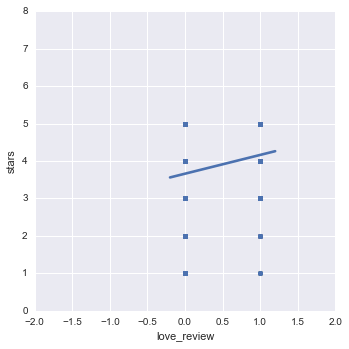

In [32]:
sns.lmplot(x='love_review', y='stars', data=yelp, ci=None, fit_reg=True)
sns.plt.xlim(-2, 2)
sns.plt.ylim(0, 8)

#### Analysis:

We can see that having the word 'love' in the review is slightly positively correlated with the number of stars.

#### Experiment:

Let's look at the heat map with the additional variable.

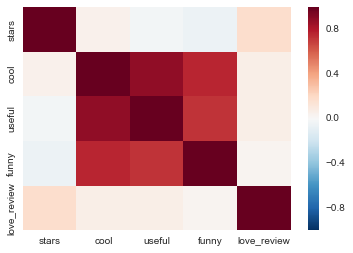

In [33]:
# Display a correlation matrix of the vote types (cool/useful/funny) with love_review and stars

%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [34]:
# Compute the RMSE for the "null model"

# Create a dataframe for the null model

yelp_null_df = yelp

# Select the same feature columns

feature_cols = ['funny', 'useful', 'cool']
X = yelp[feature_cols]

# Set all feature columns to 0

X.funny = 0
X.useful = 0
X.cool = 0

# Run linear regression on the null model

y = yelp_null_df.stars
yelp_null_df_regression = LinearRegression()
yelp_null_df_regression.fit(X, y)
yelp_null_df_X_train, yelp_null_df_X_test, yelp_null_df_y_train, yelp_null_df_y_test = train_test_split(X, y, random_state=8)
yelp_null_df_regression_train = LinearRegression()
yelp_null_df_regression_train.fit(yelp_null_df_X_train, yelp_null_df_y_train)
yelp_null_df_y_predict = yelp_null_df_regression_train.predict(yelp_null_df_X_test)
yelp_null_df_y_true = yelp_null_df_y_test

# Calculate the RMSE for the null model

np.sqrt(metrics.mean_squared_error(yelp_null_df_y_true, yelp_null_df_y_predict))

C:\Anaconda2\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1.198728422584161

#### Analysis:

The null RMSE is the RMSE that could be achieved with no features. It is a benchmark against which we may want to measure your linear regression model.

The null model has a loss of 1.198728422584161.  This is a larger error than the linear model with all three vote type features. That RMSE is 1.1729901617648542.